### 1. 实现 Simple Linear Regression
实现简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 一个特征, 一维向量
x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

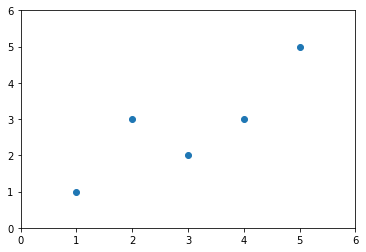

In [3]:
plt.scatter(x, y)
plt.axis([0,6,0,6])
plt.show()

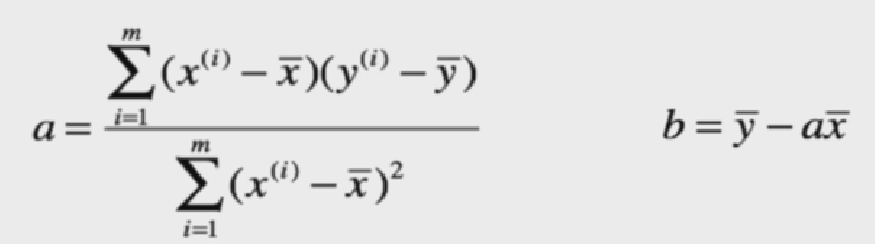

In [4]:
# 计算x, y对应的均值
x_mean = np.mean(x)
y_mean = np.mean(y)

In [5]:
# a: 既然是求和的形式, 可以用循环实现
# numerator: n. （分数中的）分子（如2/3中的2）
# Denominator: 分母
num = 0.0
d = 0.0

# 每次都从x, y中取出一个值, 用zip函数将x和y放在一起
for x_i, y_i in zip(x, y):
    num += (x_i - x_mean) * (y_i - y_mean)  # 分子部分
    d += (x_i - x_mean)**2

In [6]:
# 那么此时a=分子/分母=num/d
a = num / d
b = y_mean - a * x_mean

In [7]:
a

0.8

In [8]:
b

0.39999999999999947

In [9]:
# x是我们每一个样本点, a和b是刚刚求出来的预测斜率和截距, y_hat就是我们的预测值
y_hat = a * x + b

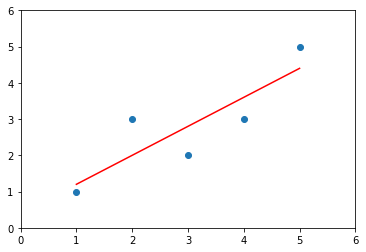

In [10]:
# 绘图的时候, 首先把x,y的散点图绘制出来
plt.scatter(x, y)

# 绘制预测直线, 颜色为红
# x还是那个x样本点, y已经是预测点y_hat了
plt.plot(x, y_hat, color='r')

# 规定坐标轴范围
plt.axis([0,6,0,6])

plt.show()

In [11]:
# 假如现在有一个x新值 x_predict
# 那么也只需要代入公式就行
x_predict = 6
y_predict = a * x_predict + b

In [12]:
# 预测结果
y_predict

5.2

### 2. 使用我们自己的SimpleLinearRegression

配置一下导包环境

In [13]:
import os
print(os.getcwd())

D:\Python\GZ_Python1804_Analysis\机器学习经典算法与应用-慕课网\第五章-线性回归法


In [16]:
import sys

# 动态添加test_package文件夹的路径，为了能让此文件夹下的
# 自定义包成功的导入
# 要根据你自己的实际包的模块来决定路径。

# sys.path.append('../')
sys.path.append('../../')
# sys.path.append('../../../')

# 打印所有python解释器可以搜索到的所有路径
print(sys.path)

['', 'D:\\Python\\Anaconda3\\python36.zip', 'D:\\Python\\Anaconda3\\DLLs', 'D:\\Python\\Anaconda3\\lib', 'D:\\Python\\Anaconda3', 'C:\\Users\\Yukirito\\AppData\\Roaming\\Python\\Python36\\site-packages', 'D:\\Python\\Anaconda3\\lib\\site-packages', 'D:\\Python\\Anaconda3\\lib\\site-packages\\win32', 'D:\\Python\\Anaconda3\\lib\\site-packages\\win32\\lib', 'D:\\Python\\Anaconda3\\lib\\site-packages\\Pythonwin', 'D:\\Python\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Yukirito\\.ipython', '../../']


In [18]:
from playML.SimpleLinearRegression import SimpleLinearRegression1

reg1 = SimpleLinearRegression1()  # 不需要传入任何的参数
reg1.fit(x, y)  # 训练模型

SimpleLinearRegression1()

In [19]:
reg1.predict(np.array([x_predict])) # 执行预测, predict要求传进去的是一个数组

array([5.2])

In [20]:
reg1.a_  # 可以看训练出来的a_, b_的参数

0.8

In [21]:
reg1.b_

0.39999999999999947

In [22]:
y_hat1 = reg1.predict(x)  # 这次传进去的是我们整个训练用的x, x和y_hat1形成的直线就是我们模型对应的直线

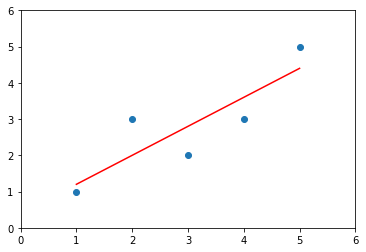

In [23]:
# 画图
plt.scatter(x, y)
plt.plot(x, y_hat1, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

### 3. 向量化创建SimpleLinearRegression2

In [24]:
from playML.SimpleLinearRegression import SimpleLinearRegression2

In [25]:
reg2 = SimpleLinearRegression2()
reg2.fit(x, y)

SimpleLinearRegression2()

In [26]:
reg2.a_

0.8

In [27]:
reg2.b_

0.39999999999999947

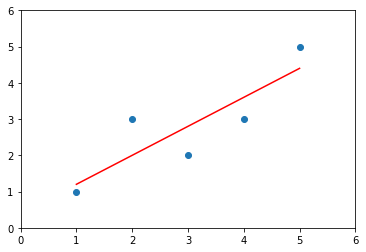

In [29]:
y_hat2 = reg2.predict(x)  # 这次传进去的是我们整个训练用的x, x和y_hat1形成的直线就是我们模型对应的直线

# 画图
plt.scatter(x, y)
plt.plot(x, y_hat2, color='r')
plt.axis([0, 6, 0, 6])
plt.show()

<b>到这里我们可以看到向量化运算简单线性回归的结果和for循环..是一样的, 说明运算结果正确</b>

### 4. 向量化实现的性能测试

In [33]:
m = 1000000
big_x = np.random.random(size=m)  # 创建一个数量为1000000的x
big_y = big_x * 2.0 + 3.0 + np.random.normal(size=m)  # big_y和big_x呈现线性关系 + 一个属于正态分布的干扰项: 规模=m

#### 代码的差别就在fit
* for
* 向量化运算

In [36]:
%timeit reg1.fit(big_x, big_y)
%timeit reg2.fit(big_x, big_y)

1.47 s ± 199 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
32 ms ± 724 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


<b>1s = 1000ms, 两者差距高达50倍</b>

所以我们能用向量化公式, 一般都用向量化.

In [37]:
reg1.a_

2.0072543546858785

In [38]:
reg1.b_

2.997323885773751

In [39]:
reg2.a_

2.0072543546858004

In [41]:
reg2.b_

2.9973238857737905